<a href="https://colab.research.google.com/github/omniaghazy/task_-session9_NeuralNetwork/blob/main/task_%2Bsession9_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🟩 1. Introduction and Setup

This notebook will guide you through building a neural network from the ground up using only PyTorch tensors. We will cover the fundamental components: the neuron, the forward pass, automatic differentiation (`autograd`), and the full training loop.

## ▶️ 1.1. Importing Libraries

First, let's import the necessary libraries. We'll need `torch` for tensor operations, `matplotlib` for plotting, and `sklearn` to create a sample dataset.

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import numpy as np

# Set a random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# 🟩 2. The Building Block: A Single Neuron

A neuron is the most basic unit of a neural network. Mathematically, it performs a weighted sum of its inputs, adds a bias, and then passes the result through an **activation function**.

The formula is: y=activation(w.x+b)

## ▶️ 2.1. The Forward Pass

The "forward pass" is the process of calculating the output y from the input x. Let's implement this manually.

### ⏩ 2.1.1. Defining Tensors

We start by creating our input `x`, weights `w`, and bias `b` as PyTorch tensors.

In [ ]:
# Create a sample input vector (e.g., 2 features)
x = torch.tensor([0.5, 0.8])

# Create weights and bias
# Weights must have a shape that allows matrix multiplication with the input
w = torch.tensor([-0.7, 0.2])
b = torch.tensor(0.1)

### ⏩ 2.1.2. Calculating the Weighted Sum

Next, we compute the weighted sum, often denoted as `z`. We use `@` for the dot product (matrix multiplication).

In [ ]:
# Calculate the weighted sum z = w·x + b
z = w @ x + b
print(f"Weighted Sum (z): {z.item():.4f}")

### ⏩ 2.1.3. Applying Activation Functions

The activation function introduces **non-linearity**, allowing the network to learn complex patterns. Without it, even a deep network would just be a single linear transformation. Let's apply two common ones: Sigmoid and ReLU.

- Sigmoid: Squashes values to a range between 0 and 1.
- ReLU (Rectified Linear Unit): Outputs the input if it's positive, otherwise, it outputs zero.

In [ ]:
# Apply Sigmoid activation
y_sigmoid = torch.sigmoid(z)
print(f"Output with Sigmoid: {y_sigmoid.item():.4f}")

# Apply ReLU activation
y_relu = torch.relu(z)
print(f"Output with ReLU: {y_relu.item():.4f}")

# 🟩 3. Automatic Differentiation with `autograd`

Training a neural network involves adjusting its weights to minimize a **loss function**. To do this, we need the gradient (derivative) of the loss with respect to each weight. PyTorch's `autograd` engine calculates these gradients for us automatically.

## ▶️ 3.1. Tracking Computations

To enable `autograd`, we set the `requires_grad=True` attribute on the tensors we want to optimize (our weights and biases). PyTorch then builds a computation graph to track all operations involving them.

In [ ]:
# Re-define weights and bias to track gradients
weights = torch.randn(2, 1, requires_grad=True)
bias = torch.randn(1, requires_grad=True)

# Define a single data point and its true label
x_train = torch.tensor([[1.0, 2.0]]) # Input features
y_true = torch.tensor([[0.0]])      # True label

# Forward pass
z = x_train @ weights + bias
y_pred = torch.sigmoid(z)

print(f"Prediction: {y_pred.item():.4f}")

## ▶️ 3.2. Calculating Loss

The loss function measures how far the model's prediction is from the true label. A common choice for binary classification is **Binary Cross-Entropy (BCE)**, but for simplicity here we'll use **Mean Squared Error (MSE)**.

In [ ]:
# Calculate the loss (e.g., Mean Squared Error)
loss = (y_pred - y_true).pow(2).sum()
print(f"Initial Loss: {loss.item():.4f}")

In [ ]:
type(loss)

## ▶️ 3.3. The Backward Pass

This is where the magic happens. Calling `.backward()` on the loss tensor calculates the gradients of the loss with respect to all tensors in the computation graph that have `requires_grad=True`. The calculated gradients are stored in the `.grad` attribute of each tensor.

In [ ]:
# Compute gradients
loss.backward()

# Inspect the gradients
print("Gradient for weights:\n", weights.grad)
print("\nGradient for bias:\n", bias.grad)

In [ ]:
new_weights = torch.sub(weights ,weights.grad)
new_bias = torch.sub(bias , bias.grad)
z = x_train @ new_weights + bias
y_pred = torch.sigmoid(z)
loss = torch.sub(y_pred , y_true).pow(2).sum()
print(f"loss : {loss.item(): .4f}")

These gradients tell us the direction and magnitude to adjust `weights` and `bias` to reduce the loss.

# 🟩 4. From a Neuron to a Multi-Layer Network

A single neuron is limited. By stacking layers of neurons, we create a Multi-Layer Neural Network (MLNN) capable of learning highly complex, non-linear relationships in data.

Our model will have:

1. An **input layer**.
2. A **hidden layer** with a ReLU activation.
3. An **output layer** with a Sigmoid activation (for binary classification).

## ▶️ 4.1. Creating a Synthetic Dataset

We'll use `make_moons` from Scikit-learn to generate a non-linearly separable dataset.

In [ ]:
# Generate 200 data points
X, y = make_moons(n_samples=200, noise=0.15, random_state=42)   #coordinates   x= data , y- label  x=[label ,0 for vertical]

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).reshape(-1 ,1) # Reshape for loss calculation
print(y_tensor)
# Visualize the data
plt.figure(figsize=(8, 5))
plt.scatter(X[y==0, 0], X[y==0, 1], label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], label='Class 1')
plt.title('Synthetic Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# 🟩 5. The Manual Training Loop

Now, we'll combine everything into a training loop to train our 2-layer network on the `moons` dataset.

The training process is an iterative cycle:

1. **Forward Pass**: Compute the model's prediction.
2. **Compute Loss**: Quantify how wrong the prediction is.
3. **Backward Pass**: Calculate gradients using `loss.backward()`.
4. **Update Weights**: Adjust weights and biases using the gradients.
5. **Zero Gradients**: Reset gradients for the next iteration.

## ▶️ 5.1. Initializing the Network

We manually define the weights and biases for each layer. The dimensions must be compatible for matrix multiplication between layers.

- `W1`, `b1`: For the hidden layer (Input: 2 features, Output: 16 features).
- `W2`, `b2`: For the output layer (Input: 16 features, Output: 1 feature).

In [ ]:
# Network architecture
n_input = 2   #num features
n_hidden = 16
n_output = 1
   # x@w + b
# Layer 1 weights and biases
W1 = torch.randn(n_input, n_hidden, requires_grad=True)
b1 = torch.zeros(n_hidden, requires_grad=True)

# Layer 2 weights and biases
W2 = torch.randn(n_hidden, n_output, requires_grad=True)
b2 = torch.zeros(n_output, requires_grad=True)

## ▶️ 5.2. Implementing the Loop

We'll run the training loop for a fixed number of `epochs`. In each epoch, we perform the five steps outlined above. Weight updates are done inside a `torch.no_grad()` context because this operation should not be part of the computation graph for gradient calculation.

In [ ]:
# Training parameters
learning_rate = 0.1
epochs = 1000
losses = []

# Training loop
for epoch in range(epochs):
    # 1. Forward Pass
    hidden_in = X_tensor @ W1 + b1
    hidden_out = torch.relu(hidden_in)
    final_in = hidden_out @ W2 + b2
    y_pred = torch.sigmoid(final_in)

    # 2. Compute Loss (Binary Cross-Entropy)
    loss = -torch.mean(y_tensor * torch.log(y_pred) + (1 - y_tensor) * torch.log(1 - y_pred))
    losses.append(loss.item())

    # 3. Backward Pass
    loss.backward()

    # 4. Update Weights
    with torch.no_grad():
        W1 -= learning_rate * W1.grad
        b1 -= learning_rate * b1.grad
        W2 -= learning_rate * W2.grad
        b2 -= learning_rate * b2.grad

    # 5. Zero Gradients
    W1.grad.zero_()
    b1.grad.zero_()
    W2.grad.zero_()
    b2.grad.zero_()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs} | Loss: {loss.item():.4f}")

print(f"Final Loss: {losses[-1]:.4f}")

## ▶️ 5.3. Visualizing the Loss

Plotting the loss over epochs is a great way to see if the model is learning. We expect the loss to decrease over time.

In [ ]:
# Plot the loss curve
plt.figure(figsize=(8, 5))
plt.plot(losses)
plt.title('Training Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# 🟩 6. Visualizing the Model's Decision Boundary

After training, we want to see how well our model learned to separate the two classes. A great way to do this is by plotting its **decision boundary**. We will create a grid of points across the feature space, have our model predict the class for each point, and then color the regions accordingly. This shows us the line where the model switches from predicting one class to the other.

## ▶️ 6.1. Plotting the Boundary

The code below defines a function to plot the boundary. It performs a forward pass on a mesh grid of points and uses `plt.contourf` to create a filled contour plot representing the predicted regions for each class.

In [ ]:
def plot_decision_boundary(X, y, W1, b1, W2, b2):
    """
    Plots the decision boundary of a 2-layer neural network.

    Args:
        X (torch.Tensor): Input features.
        y (torch.Tensor): True labels.
        W1, b1: Parameters of the first layer.
        W2, b2: Parameters of the second layer.
    """
    # Create a grid to cover the data space
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                           np.arange(y_min, y_max, 0.02))

    # Prepare grid points for the model
    grid_points = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

    # Perform a forward pass on the grid points (inference mode)
    with torch.no_grad():
        hidden_in = grid_points @ W1 + b1
        hidden_out = torch.relu(hidden_in)
        final_in = hidden_out @ W2 + b2
        # Get predictions (0 or 1) by rounding the sigmoid output
        Z = torch.sigmoid(final_in).round()

    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.title("Decision Boundary of the Trained Network")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Call the function with our trained weights
plot_decision_boundary(X_tensor, y_tensor, W1, b1, W2, b2)

# Quick Experiments with Hyperparameters and Architecture (Optional)

The goal of this task is to get hands-on experience by modifying the neural network you just built. You will perform three small experiments to see how changing key components affects the model's training and performance.

Each experiment should only take a few minutes. After making the change, re-run the cells in sections **5.2**, **5.3**, and **6.1** to train the model and visualize the new results.

---

## Experiment 1: The Impact of the Learning Rate

The learning rate is a critical hyperparameter that controls how large of a step the model takes during gradient descent to minimize loss.

### What to do:
In section **5.2**, find the line `learning_rate = 0.1`.
1. First, change it to a much larger value: `learning_rate = 1.5`. Re-run the training.
2. Then, change it to a much smaller value: `learning_rate = 0.001`. Re-run the training again.

### What to observe:
* How does the **Training Loss vs. Epoch** plot change for each learning rate?
* Does the large learning rate cause the loss to become unstable or "explode"?
* Does the small learning rate cause the training to become very slow?
* How does the final decision boundary look in each case?



In [ ]:
# Network architecture
n_input = 2   #num features
n_hidden = 16
n_output = 1
   # x@w + b
# Layer 1 weights and biases
W1 = torch.randn(n_input, n_hidden, requires_grad=True)
b1 = torch.zeros(n_hidden, requires_grad=True)

# Layer 2 weights and biases
W2 = torch.randn(n_hidden, n_output, requires_grad=True)
b2 = torch.zeros(n_output, requires_grad=True)
learning_rate = [.01 ,.1 ,1.5,0.001]
epochs = 1000
losses=[]

for a in learning_rate:
  print(f"learning rate = {a}")
  for epoch in range(epochs):
  #
    hidden_in = X_tensor @ W1 + b1
    hidden_out = torch.relu(hidden_in)
    final_in = hidden_out @ W2 + b2
    y_pred = torch.sigmoid(final_in)

  # loss
    loss = -torch.mean( y_tensor * torch.log(y_pred) + (1 - y_tensor) * torch.log(1 - y_pred))
    losses.append(loss.item())

  # backward
    loss.backward()

  # update weights

    with torch.no_grad():
        W1 -= a * W1.grad
        b1 -= a * b1.grad
        W2 -= a * W2.grad
        b2 -= a * b2.grad

  # torch.grad.zero_
    W1.grad.zero_()
    b1.grad.zero_()
    W2.grad.zero_()
    b2.grad.zero_()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs} | Loss: {loss.item():.4f}")

  print(f"Final Loss: {losses[-1]:.4f}")
  # Plot the loss curve
  plt.figure(figsize=(8, 5))
  plt.plot(losses)
  plt.title('Training Loss vs. Epoch')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.show()




---

## Experiment 2: The Role of the Activation Function

Activation functions introduce the non-linearity that allows networks to learn complex patterns. The code uses ReLU in the hidden layer, but let's try another one mentioned in the slides: Tanh.

### What to do:
In section **5.2**, find the **Forward Pass** block. Change the line `hidden_out = torch.relu(hidden_in)` to `hidden_out = torch.tanh(hidden_in)`.

### What to observe:
* Does the model still learn to separate the data?
* Compare the final loss and the shape of the decision boundary to the original one that used ReLU. Tanh squashes values between -1 and 1, which can sometimes change training dynamics.



learning rate = 0.001
Epoch 0/1000 | Loss: 1.4623
Epoch 100/1000 | Loss: 1.2886
Epoch 200/1000 | Loss: 1.1377
Epoch 300/1000 | Loss: 1.0089
Epoch 400/1000 | Loss: 0.9009
Epoch 500/1000 | Loss: 0.8120
Epoch 600/1000 | Loss: 0.7396
Epoch 700/1000 | Loss: 0.6810
Epoch 800/1000 | Loss: 0.6332
Epoch 900/1000 | Loss: 0.5940
Final Loss: 0.5617


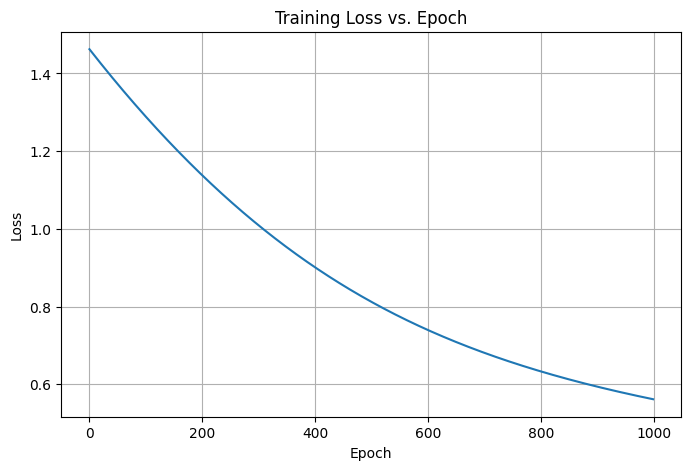

learning rate = 0.01
Epoch 0/1000 | Loss: 0.5614
Epoch 100/1000 | Loss: 0.4001
Epoch 200/1000 | Loss: 0.3429
Epoch 300/1000 | Loss: 0.3150
Epoch 400/1000 | Loss: 0.2989
Epoch 500/1000 | Loss: 0.2886
Epoch 600/1000 | Loss: 0.2813
Epoch 700/1000 | Loss: 0.2757
Epoch 800/1000 | Loss: 0.2712
Epoch 900/1000 | Loss: 0.2673
Final Loss: 0.2639


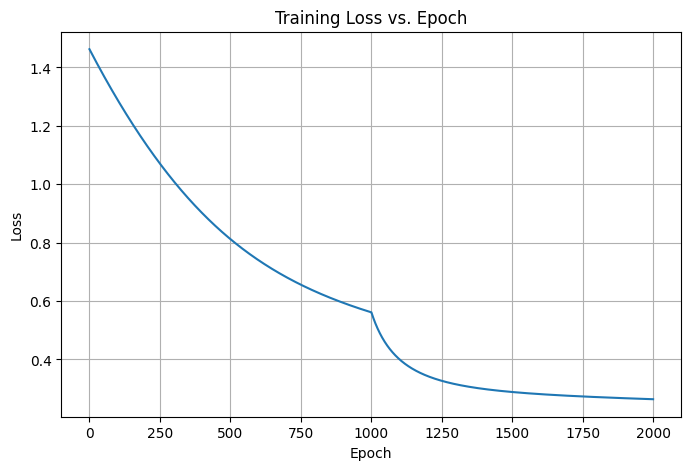

learning rate = 0.1
Epoch 0/1000 | Loss: 0.2639
Epoch 100/1000 | Loss: 0.2370
Epoch 200/1000 | Loss: 0.2130
Epoch 300/1000 | Loss: 0.1913
Epoch 400/1000 | Loss: 0.1725
Epoch 500/1000 | Loss: 0.1565
Epoch 600/1000 | Loss: 0.1429
Epoch 700/1000 | Loss: 0.1315
Epoch 800/1000 | Loss: 0.1219
Epoch 900/1000 | Loss: 0.1136
Final Loss: 0.1065


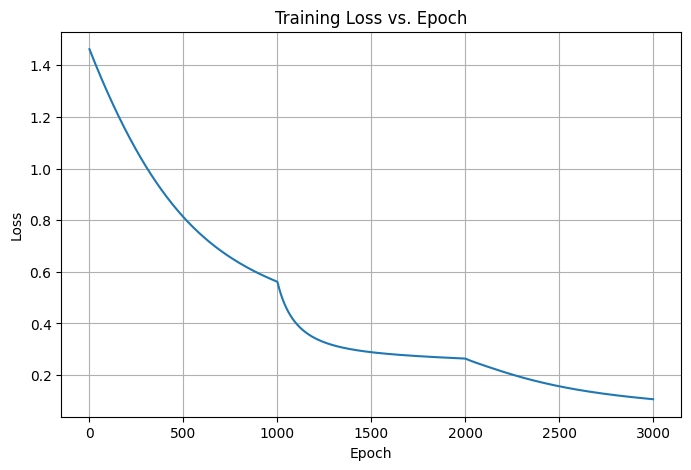

In [85]:
# Network architecture
n_input = 2   #num features
n_hidden = 16
n_output = 1
   # x@w + b
# Layer 1 weights and biases
W1 = torch.randn(n_input, n_hidden, requires_grad=True)
b1 = torch.zeros(n_hidden, requires_grad=True)

# Layer 2 weights and biases
W2 = torch.randn(n_hidden, n_output, requires_grad=True)
b2 = torch.zeros(n_output, requires_grad=True)
learning_rate = [.001 ,.01 ,.1]
epochs = 1000
losses=[]

for a in learning_rate:
  print(f"learning rate = {a}")
  for epoch in range(epochs):
  #
    hidden_in = X_tensor @ W1 + b1
    hidden_out = torch.tanh(hidden_in)
    final_in = hidden_out @ W2 + b2
    y_pred = torch.sigmoid(final_in)

  # loss
    loss = -torch.mean( y_tensor * torch.log(y_pred) + (1 - y_tensor) * torch.log(1 - y_pred))
    losses.append(loss.item())

  # backward
    loss.backward()

  # update weights

    with torch.no_grad():
        W1 -= a * W1.grad
        b1 -= a * b1.grad
        W2 -= a * W2.grad
        b2 -= a * b2.grad

  # torch.grad.zero_
    W1.grad.zero_()
    b1.grad.zero_()
    W2.grad.zero_()
    b2.grad.zero_()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs} | Loss: {loss.item():.4f}")

  print(f"Final Loss: {losses[-1]:.4f}")
  # Plot the loss curve
  plt.figure(figsize=(8, 5))
  plt.plot(losses)
  plt.title('Training Loss vs. Epoch')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.show()




---

## Experiment 3: Adjusting Model Capacity (Hidden Layer Size)

The number of neurons in a hidden layer determines its "capacity"—how complex a function it can learn.

### What to do:
In section **5.1**, find the line `n_hidden = 16`.
1. First, decrease the capacity: Change it to `n_hidden = 4`. Re-run the initialization and training cells.
2. Then, increase the capacity: Change it to `n_hidden = 128`. Re-run again.

### What to observe:
* How does the decision boundary change? With fewer neurons, can the model still create a smooth, non-linear boundary?
* With more neurons, does the boundary become more complex or "wiggly"? This can be a sign of the model starting to overfit.

learning rate = 0.01
Epoch 0/1000 | Loss: 1.8753
Epoch 100/1000 | Loss: 0.5867
Epoch 200/1000 | Loss: 0.5122
Epoch 300/1000 | Loss: 0.4715
Epoch 400/1000 | Loss: 0.4396
Epoch 500/1000 | Loss: 0.4090
Epoch 600/1000 | Loss: 0.3866
Epoch 700/1000 | Loss: 0.3697
Epoch 800/1000 | Loss: 0.3566
Epoch 900/1000 | Loss: 0.3463
Final Loss: 0.3379


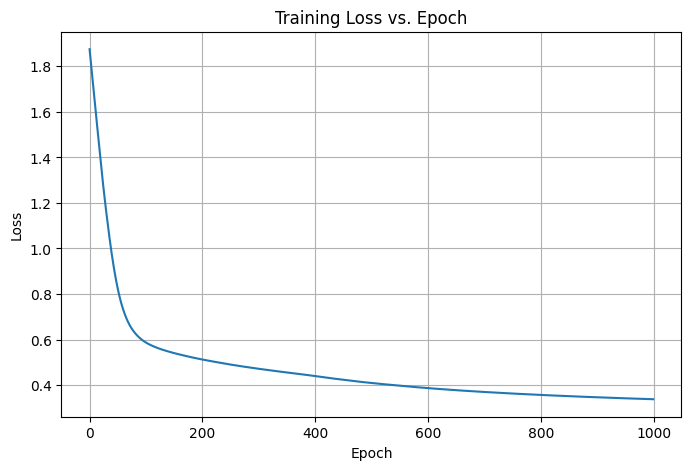

learning rate = 0.1
Epoch 0/1000 | Loss: 0.3378
Epoch 100/1000 | Loss: 0.2919
Epoch 200/1000 | Loss: 0.2762
Epoch 300/1000 | Loss: 0.2700
Epoch 400/1000 | Loss: 0.2669
Epoch 500/1000 | Loss: 0.2648
Epoch 600/1000 | Loss: 0.2633
Epoch 700/1000 | Loss: 0.2612
Epoch 800/1000 | Loss: 0.2596
Epoch 900/1000 | Loss: 0.2585
Final Loss: 0.2577


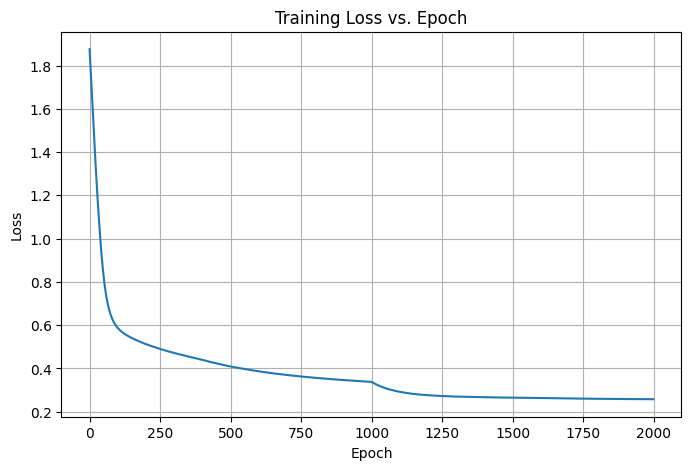

learning rate = 1.5
Epoch 0/1000 | Loss: 0.2576
Epoch 100/1000 | Loss: 0.2535
Epoch 200/1000 | Loss: 0.2524
Epoch 300/1000 | Loss: 0.2516
Epoch 400/1000 | Loss: 0.2499
Epoch 500/1000 | Loss: 0.2491
Epoch 600/1000 | Loss: 0.2482
Epoch 700/1000 | Loss: 0.2479
Epoch 800/1000 | Loss: 0.2472
Epoch 900/1000 | Loss: 0.2470
Final Loss: 0.2469


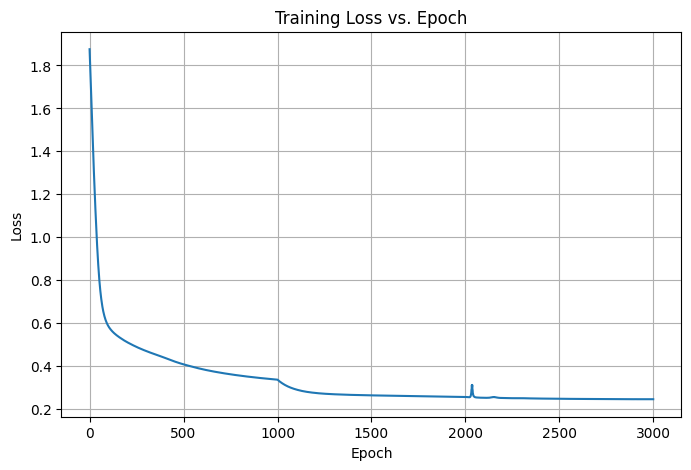

learning rate = 0.001
Epoch 0/1000 | Loss: 0.2469
Epoch 100/1000 | Loss: 0.2469
Epoch 200/1000 | Loss: 0.2468
Epoch 300/1000 | Loss: 0.2468
Epoch 400/1000 | Loss: 0.2468
Epoch 500/1000 | Loss: 0.2468
Epoch 600/1000 | Loss: 0.2468
Epoch 700/1000 | Loss: 0.2468
Epoch 800/1000 | Loss: 0.2468
Epoch 900/1000 | Loss: 0.2468
Final Loss: 0.2468


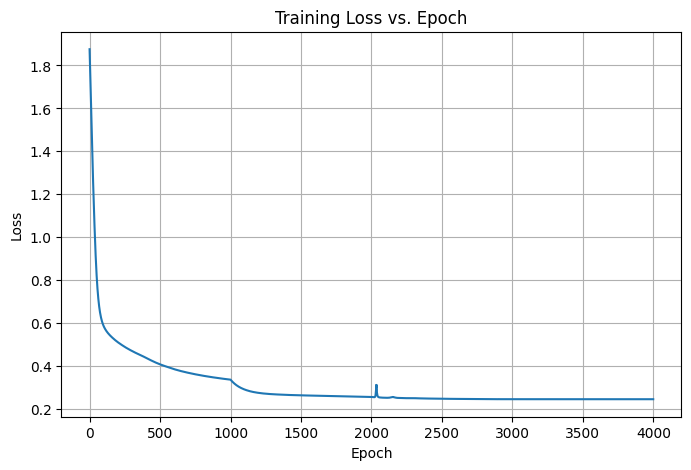

In [84]:
# Network architecture
n_input = 2   #num features
n_hidden = 4
n_output = 1
   # x@w + b
# Layer 1 weights and biases
W1 = torch.randn(n_input, n_hidden, requires_grad=True)
b1 = torch.zeros(n_hidden, requires_grad=True)

# Layer 2 weights and biases
W2 = torch.randn(n_hidden, n_output, requires_grad=True)
b2 = torch.zeros(n_output, requires_grad=True)
learning_rate = [.01 ,.1 ,1.5,0.001]
epochs = 1000
losses=[]

for a in learning_rate:
  print(f"learning rate = {a}")
  for epoch in range(epochs):
  #
    hidden_in = X_tensor @ W1 + b1
    hidden_out = torch.relu(hidden_in)
    final_in = hidden_out @ W2 + b2
    y_pred = torch.sigmoid(final_in)

  # loss
    loss = -torch.mean( y_tensor * torch.log(y_pred) + (1 - y_tensor) * torch.log(1 - y_pred))
    losses.append(loss.item())

  # backward
    loss.backward()

  # update weights

    with torch.no_grad():
        W1 -= a * W1.grad
        b1 -= a * b1.grad
        W2 -= a * W2.grad
        b2 -= a * b2.grad

  # torch.grad.zero_
    W1.grad.zero_()
    b1.grad.zero_()
    W2.grad.zero_()
    b2.grad.zero_()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs} | Loss: {loss.item():.4f}")

  print(f"Final Loss: {losses[-1]:.4f}")
  # Plot the loss curve
  plt.figure(figsize=(8, 5))
  plt.plot(losses)
  plt.title('Training Loss vs. Epoch')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.show()




learning rate = 0.01
Epoch 0/1000 | Loss: 8.4269
Epoch 100/1000 | Loss: 0.3375
Epoch 200/1000 | Loss: 0.2853
Epoch 300/1000 | Loss: 0.2528
Epoch 400/1000 | Loss: 0.2313
Epoch 500/1000 | Loss: 0.2152
Epoch 600/1000 | Loss: 0.2019
Epoch 700/1000 | Loss: 0.1921
Epoch 800/1000 | Loss: 0.1834
Epoch 900/1000 | Loss: 0.1763
Final Loss: 0.1708


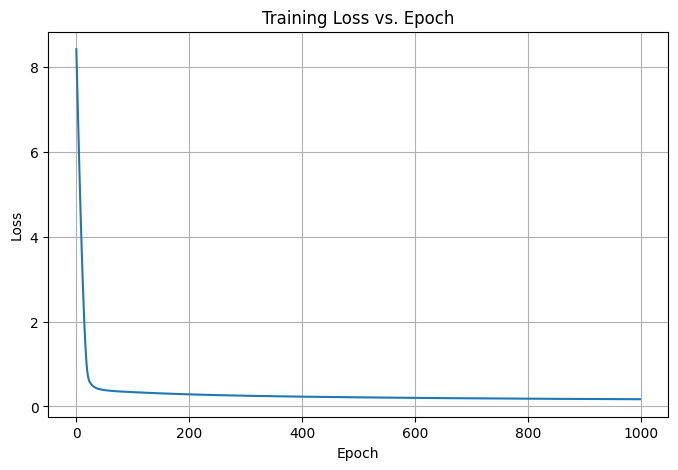

learning rate = 0.1
Epoch 0/1000 | Loss: 0.1707
Epoch 100/1000 | Loss: 0.1276
Epoch 200/1000 | Loss: 0.0954
Epoch 300/1000 | Loss: 0.0805
Epoch 400/1000 | Loss: 0.0711
Epoch 500/1000 | Loss: 0.0638
Epoch 600/1000 | Loss: 0.0582
Epoch 700/1000 | Loss: 0.0536
Epoch 800/1000 | Loss: 0.0500
Epoch 900/1000 | Loss: 0.0468
Final Loss: 0.0442


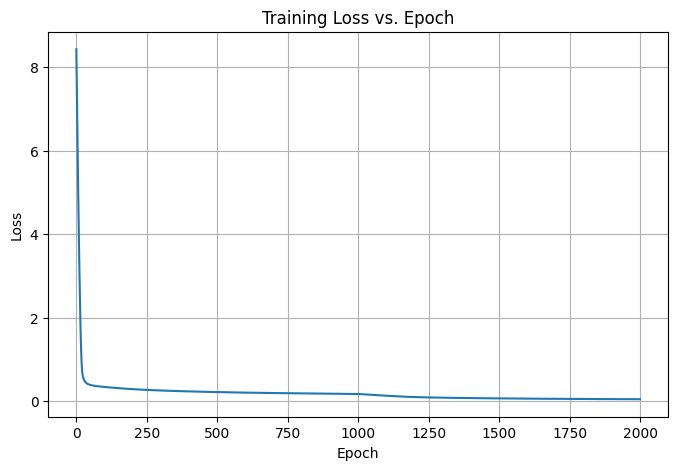

learning rate = 1.5
Epoch 0/1000 | Loss: 0.0441
Epoch 100/1000 | Loss: nan
Epoch 200/1000 | Loss: nan
Epoch 300/1000 | Loss: nan
Epoch 400/1000 | Loss: nan
Epoch 500/1000 | Loss: nan
Epoch 600/1000 | Loss: nan
Epoch 700/1000 | Loss: nan
Epoch 800/1000 | Loss: nan
Epoch 900/1000 | Loss: nan
Final Loss: nan


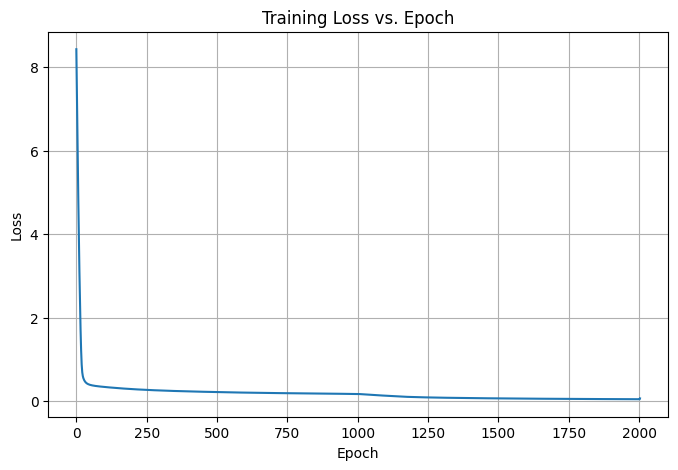

learning rate = 0.001
Epoch 0/1000 | Loss: nan
Epoch 100/1000 | Loss: nan
Epoch 200/1000 | Loss: nan
Epoch 300/1000 | Loss: nan
Epoch 400/1000 | Loss: nan
Epoch 500/1000 | Loss: nan
Epoch 600/1000 | Loss: nan
Epoch 700/1000 | Loss: nan
Epoch 800/1000 | Loss: nan
Epoch 900/1000 | Loss: nan
Final Loss: nan


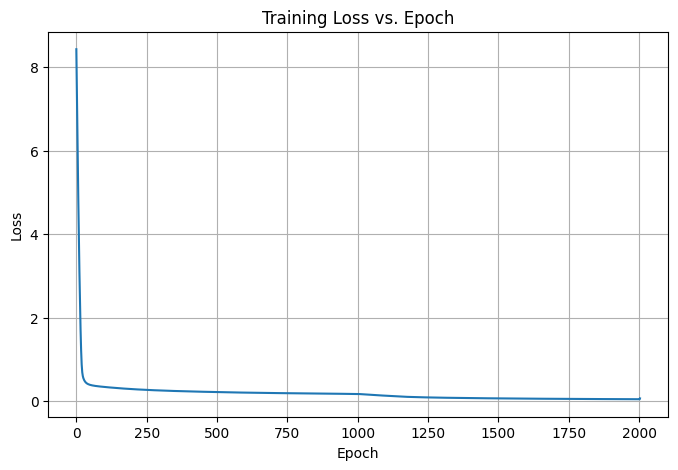

In [83]:
# Network architecture
n_input = 2   #num features
n_hidden = 128
n_output = 1
   # x@w + b
# Layer 1 weights and biases
W1 = torch.randn(n_input, n_hidden, requires_grad=True)
b1 = torch.zeros(n_hidden, requires_grad=True)

# Layer 2 weights and biases
W2 = torch.randn(n_hidden, n_output, requires_grad=True)
b2 = torch.zeros(n_output, requires_grad=True)
learning_rate = [.01 ,.1 ,1.5,0.001]
epochs = 1000
losses=[]

for a in learning_rate:
  print(f"learning rate = {a}")
  for epoch in range(epochs):
  #
    hidden_in = X_tensor @ W1 + b1
    hidden_out = torch.relu(hidden_in)
    final_in = hidden_out @ W2 + b2
    y_pred = torch.sigmoid(final_in)

  # loss
    loss = -torch.mean( y_tensor * torch.log(y_pred) + (1 - y_tensor) * torch.log(1 - y_pred))
    losses.append(loss.item())

  # backward
    loss.backward()

  # update weights

    with torch.no_grad():
        W1 -= a * W1.grad
        b1 -= a * b1.grad
        W2 -= a * W2.grad
        b2 -= a * b2.grad

  # torch.grad.zero_
    W1.grad.zero_()
    b1.grad.zero_()
    W2.grad.zero_()
    b2.grad.zero_()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs} | Loss: {loss.item():.4f}")

  print(f"Final Loss: {losses[-1]:.4f}")
  # Plot the loss curve
  plt.figure(figsize=(8, 5))
  plt.plot(losses)
  plt.title('Training Loss vs. Epoch')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.show()


